In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("../amazon/ratings_Beauty.csv")

In [57]:
df.head()

UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200

In [5]:
df.shape

(2023070, 4)

In [6]:
df.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')

df2.columns()

In [7]:
df.describe()

Rating     Timestamp
count  2.023070e+06  2.023070e+06
mean   4.149036e+00  1.360389e+09
std    1.311505e+00  4.611860e+07
min    1.000000e+00  9.087552e+08
25%    4.000000e+00  1.350259e+09
50%    5.000000e+00  1.372810e+09
75%    5.000000e+00  1.391472e+09
max    5.000000e+00  1.406074e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [9]:
print(df['UserId'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          A39HTATAQ9V7YF
1          A3JM6GV9MNOF9X
2          A1Z513UWSAAO0F
3          A1WMRR494NWEWV
4          A3IAAVS479H7M7
                ...      
2023065    A3DEHKPFANB8VA
2023066    A3DEHKPFANB8VA
2023067     AG9TJLJUN5OM3
2023068     AYBIB14QOI9PC
2023069    A1PB6OT0OOPKNQ
Name: UserId, Length: 2023070, dtype: object>


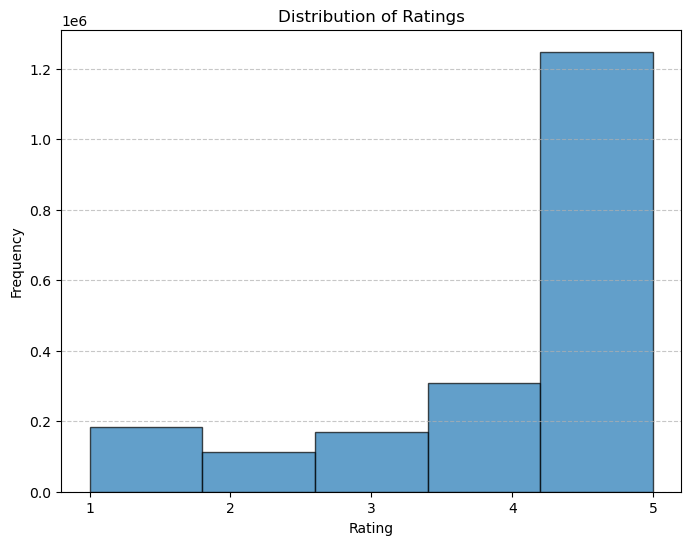

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming ratings are integers from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [11]:
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

Rating
ProductId         
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589

<Axes: xlabel='ProductId'>

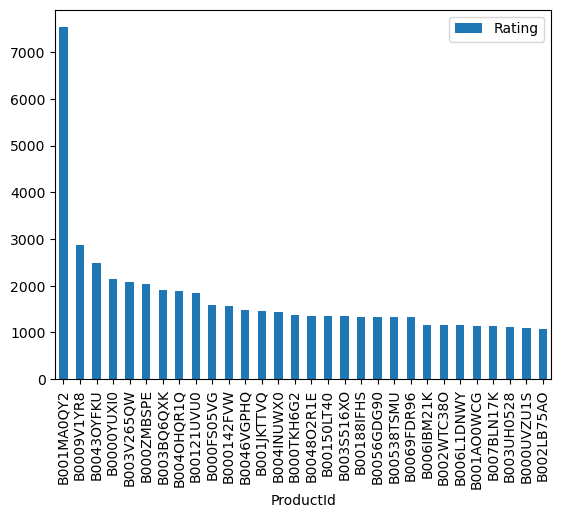

In [12]:
most_popular.head(30).plot(kind = "bar")

In [13]:
rating_users = pd.DataFrame(df.groupby('UserId')['Rating'].count())
most_rating = rating_users.sort_values('Rating', ascending=False)
most_rating.head(10)

Rating
UserId                
A3KEZLJ59C1JVH     389
A281NPSIMI1C2R     336
A3M174IC0VXOS2     326
A2V5R832QCSOMX     278
A3LJLRIZL38GG3     276
ALQGOMOY1F5X9      275
AKMEY1BSHSDG7      269
A3R9H6OKZHHRJD     259
A1M04H40ZVGWVG     249
A1RRMZKOMZ2M7J     225

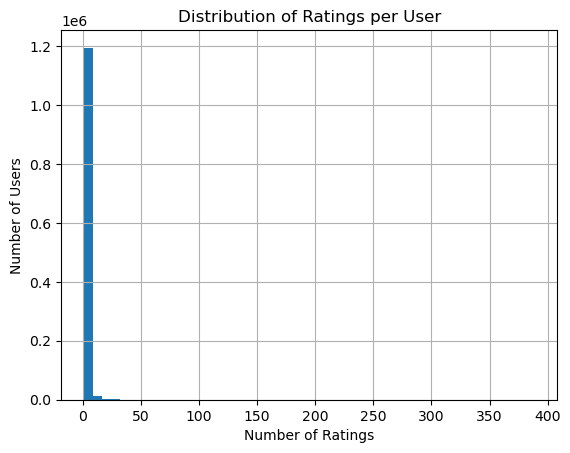

In [14]:
user_ratings_counts = df.groupby('UserId')['Rating'].count()
user_ratings_counts.hist(bins=50)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

<Axes: xlabel='UserId'>

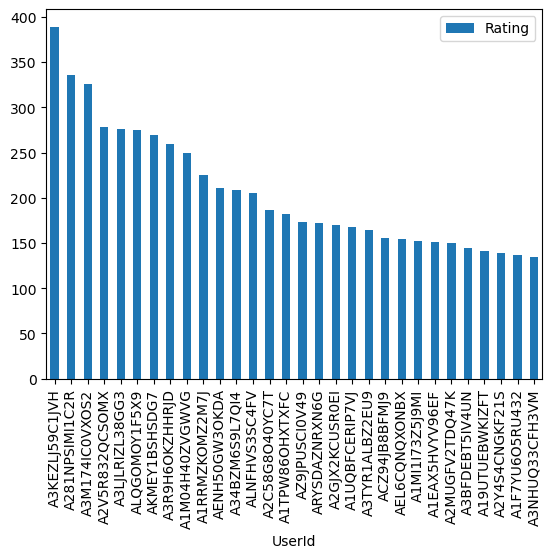

In [15]:
most_rating.head(30).plot(kind = "bar")

In [16]:
# from datetime import datetime
# df['Datetime'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# # Plot ratings over time
# plt.figure(figsize=(12, 6))
# df.groupby(df['Timestamp'].dt.year)['Rating'].count().plot(kind='bar')
# plt.title('Number of Ratings Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Ratings')
# plt.show()

# plt.show()

## Pretraitement

In [17]:
# les lignes dupliquées
duplicates = df[df.duplicated(['UserId', 'ProductId'], keep=False)]
print(duplicates)

#valeur manquantes
missing_values = df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [UserId, ProductId, Rating, Timestamp]
Index: []
UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


## by product

In [18]:
df2 = pd.read_csv("../amazon/product_descriptions.csv")
df2 = df2.dropna(subset=['product_uid'])
df2 = df2.dropna(subset=['product_description'])
df2 = df2.head(10000)


In [19]:
df2.columns

Index(['product_uid', 'product_description'], dtype='object')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# creating the tf-idf Vectorizer to analyze, at word level, unigrams and bigrams
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2)) 
 
# applying the vectorizer on the 'tags' column
tfidf_matrix = tf.fit_transform(df2['product_description'])
 
# compute the cosine similarity between all the samples in the matrix
cosine_sim = cosine_similarity(tfidf_matrix) 
 
# saving the values in a DataFrame for better visualisation
cosine_sim_df = pd.DataFrame(cosine_sim, index=df2['product_uid'], columns=df2['product_uid']) 

In [21]:
def get_recommendations(product_uid, similarity_df, df, k=10):
    ix = similarity_df.loc[:,product_uid].to_numpy().argpartition(range(-1,-k,-1))
    closest = similarity_df.columns[ix[-1:-(k+2):-1]]    
    closest = closest.drop(product_uid, errors='ignore')    
    return pd.DataFrame(closest).merge(df).head(k) 

In [32]:
print(get_recommendations(100003  ,cosine_sim_df, df2 ))

   product_uid                                product_description
0       109410  Made of solid Vikrell material, Ensemble by ST...
1       100081  Made of solid Vikrell material, the Accord ser...
2       103705  The Accord 32 in. bath/shower, made of solid V...
3       101011  Style and functionality come together with the...
4       100600  Made of solid Vikrell material, the 4 piece mo...
5       106006  Ensemble 60 in. x 1-1/4 in. x 72-1/2 in. 1-pie...
6       100441  The STERLING Accord Bath and Shower Kit have a...
7       103813  When classic meets contemporary in the Accord ...
8       106661  The clean, minimal design of the Accord bath i...
9       107156  The Accord 32 in. bath/shower blends tradition...


## By user (Collaborative filtering)

In [88]:
ratings = df.head(10000)
ratings['UserId'], user_id_mapping = pd.factorize(ratings['UserId'])
ratings['ProductId'], product_id_mapping = pd.factorize(ratings['ProductId'])

<bound method NDFrame.head of               UserId   ProductId  Rating   Timestamp
0     A39HTATAQ9V7YF  0205616461     5.0  1369699200
1     A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2     A1Z513UWSAAO0F  0558925278     5.0  1404691200
3     A1WMRR494NWEWV  0733001998     4.0  1382572800
4     A3IAAVS479H7M7  0737104473     1.0  1274227200
...              ...         ...     ...         ...
9995   A9V4K2YJ2DWTQ  B000052YQ2     3.0  1396396800
9996  A3033CXHQ0NF8J  B000052YQ2     5.0  1291248000
9997  A1Z66KHEXSF3L5  B000052YQ2     3.0  1361577600
9998  A1Y7D2DRVBN59D  B000052YQ2     5.0  1402099200
9999   APYKGTU0LFICH  B000052YQ2     2.0  1387238400

[10000 rows x 4 columns]>


C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_14784\3515447534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['UserId'], user_id_mapping = pd.factorize(ratings['UserId'])
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_14784\3515447534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['ProductId'], product_id_mapping = pd.factorize(ratings['ProductId'])


In [74]:
ratings.head

<bound method NDFrame.head of       UserId  ProductId  Rating   Timestamp
0          0          0     5.0  1369699200
1          1          1     3.0  1355443200
2          2          1     5.0  1404691200
3          3          2     4.0  1382572800
4          4          3     1.0  1274227200
...      ...        ...     ...         ...
9995    9693        885     3.0  1396396800
9996    9694        885     5.0  1291248000
9997    9695        885     3.0  1361577600
9998    9696        885     5.0  1402099200
9999    6269        885     2.0  1387238400

[10000 rows x 4 columns]>

In [75]:
utility_matrix = ratings.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
utility_matrix.head()

ProductId  0    1    2    3    4    5    6    7    8    9    ...  876  877  \
UserId                                                       ...             
0            5    0    0    0    0    0    0    0    0    0  ...    0    0   
1            0    3    0    0    0    0    0    0    0    0  ...    0    0   
2            0    5    0    0    0    0    0    0    0    0  ...    0    0   
3            0    0    4    0    0    0    0    0    0    0  ...    0    0   
4            0    0    0    1    0    0    0    0    0    0  ...    0    0   

ProductId  878  879  880  881  882  883  884  885  
UserId                                             
0            0    0    0    0    0    0    0    0  
1            0    0    0    0    0    0    0    0  
2            0    0    0    0    0    0    0    0  
3            0    0    0    0    0    0    0    0  
4            0    0    0    0    0    0    0    0  

[5 rows x 886 columns]

In [76]:
ratings['UserId'] = ratings['UserId'].astype(int)
ratings['ProductId'] = ratings['ProductId'].astype(int)
ratings['Timestamp'] = ratings['Timestamp'].astype(int)
ratings['Rating'] = ratings['Rating'].astype(int)
ratings.dtypes


C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_14784\4179312993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['UserId'] = ratings['UserId'].astype(int)
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_14784\4179312993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['ProductId'] = ratings['ProductId'].astype(int)
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_14784\4179312993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


UserId       int32
ProductId    int32
Rating       int32
Timestamp    int32
dtype: object

In [77]:
# create URM
 
URM = np.zeros((ratings['UserId'].size, ratings['ProductId'].size), dtype=int)
 
for _, row in ratings.iterrows():
   URM[row['UserId'] - 1, row['ProductId'] - 1 ] = row['Rating']

In [78]:
 
from sklearn.metrics.pairwise import cosine_similarity

def similar_users(user_id, URM, N = 3):
   number_of_users = URM.shape[0]
 
   other_users_ids = np.array(range(number_of_users), dtype=int)
   other_users_ids = np.delete(other_users_ids, user_id).tolist()
 

   user = URM[user_id].tolist()
 

   other_users_similarity = []
 
   for other_user_id in other_users_ids:
     other_user = URM[other_user_id].tolist()
     other_users_similarity.append(cosine_similarity_pair_of_users(user, other_user))
 

   index_similarities = dict(zip(other_users_ids, other_users_similarity))
 

   index_similarity_sorted = sorted(index_similarities.items(), key=lambda x: x[1], reverse=True)
 

   top_user_similarity = index_similarity_sorted[:N]
 
   top_user_ids = [usr[0] for usr in top_user_similarity]
 
   return top_user_ids

def cosine_similarity_pair_of_users(user1, user2):
    # Reshape the user arrays to be 2D for cosine_similarity function
    user1 = np.array(user1).reshape(1, -1)
    user2 = np.array(user2).reshape(1, -1)

    # Compute cosine similarity
    similarity = cosine_similarity(user1, user2)[0, 0]
    return similarity


In [79]:
example_user_id = 48
top_similar_users = similar_users(example_user_id, URM)

In [80]:
print(top_similar_users)

[49, 50, 0]


In [83]:
def recommend_topK_items_for_user(user_id, similar_users_ids, URM, topK = 5):
  
   similar_users = URM[similar_users_ids]
  
   average_ratings = similar_users.mean(axis=0)
    
   user = URM[user_id]
   
   user_transposed = user.transpose()
 
   items = np.where(user_transposed == 0)[0]
 
   average_ratings = average_ratings[items]
 
   item_indexes = np.argsort(average_ratings)[::-1]
 
   top_items_index = item_indexes[:topK]
 
   return top_items_index.tolist()

In [85]:
recommended_items = recommend_topK_items_for_user(example_user_id, top_similar_users, URM)
 
print(recommended_items)

[0, 3329, 3336, 3335, 3334]
